IGN game reviews/scores data set.

 - Loading a dataset
 - Performing dataset inspection with Pandas Profiling
 - Doing analysis and plotting on various dataset aspects

In [179]:
import pandas as pd
import numpy as np
import pandas_profiling as pp

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")


In [220]:
df = pd.read_csv("ign.csv")

In [76]:
df.pop('Unnamed: 0')

0            0
1            1
2            2
3            3
4            4
5            5
6            6
7            7
8            8
9            9
10          10
11          11
12          12
13          13
14          14
15          15
16          16
17          17
18          18
19          19
20          20
21          21
22          22
23          23
24          24
25          25
26          26
27          27
28          28
29          29
         ...  
18595    18595
18596    18596
18597    18597
18598    18598
18599    18599
18600    18600
18601    18601
18602    18602
18603    18603
18604    18604
18605    18605
18606    18606
18607    18607
18608    18608
18609    18609
18610    18610
18611    18611
18612    18612
18613    18613
18614    18614
18615    18615
18616    18616
18617    18617
18618    18618
18619    18619
18620    18620
18621    18621
18622    18622
18623    18623
18624    18624
Name: Unnamed: 0, Length: 18625, dtype: int64

Unnamed: 0 score_phrase  \
0               0      Amazing   
1               1      Amazing   
2               2        Great   
3               3        Great   
4               4        Great   
5               5         Good   
6               6        Awful   
7               7      Amazing   
8               8        Awful   
9               9         Good   
10             10         Good   
11             11         Good   
12             12         Good   
13             13      Amazing   
14             14      Amazing   
15             15         Okay   
16             16         Okay   
17             17        Great   
18             18     Mediocre   
19             19         Good   
20             20         Good   
21             21         Good   
22             22         Good   
23             23         Good   
24             24      Amazing   
25             25         Good   
26             26      Amazing   
27             27         Good   
28             28        Great   
29             29         Okay   
...           ...          ...   
18595       18595          Bad   
18596       18596         Okay   
18597       18597          Bad   
18598       18598         Okay   
18599       18599         Good   
18600       18600         Good   
18601       18601         Good   
18602       18602         Good   
18603       18603         Good   
18604       18604        Great   
18605       18605         Okay   
18606       18606         Okay   
18607       18607         Good   
18608       18608     Mediocre   
18609       18609        Great   
18610       18610         Okay   
18611       18611     Mediocre   
18612       18612         Good   
18613       18613        Great   
18614       18614      Amazing   
18615       18615      Amazing   
18616       18616         Good   
18617       18617        Great   
18618       18618      Amazing   
18619       18619         Good   
18620       18620         Good   
18621       18621      Amazing   
18622       18622     Mediocre   
18623       18623  Masterpiece   
18624       18624  Masterpiece   

                                                   title  \
0                                LittleBigPlanet PS Vita   
1      LittleBigPlanet PS Vita -- Marvel Super Hero E...   
2                                   Splice: Tree of Life   
3                                                 NHL 13   
4                                                 NHL 13   
5                              Total War Battles: Shogun   
6                                    Double Dragon: Neon   
7                                           Guild Wars 2   
8                                    Double Dragon: Neon   
9                              Total War Battles: Shogun   
10                               Tekken Tag Tournament 2   
11                               Tekken Tag Tournament 2   
12                                            Wild Blood   
13                                     Mark of the Ninja   
14                                     Mark of the Ninja   
15                       Home: A Unique Horror Adventure   
16                       Home: A Unique Horror Adventure   
17                                   Avengers Initiative   
18                                  Way of the Samurai 4   
19                           JoJo's Bizarre Adventure HD   
20                           JoJo's Bizarre Adventure HD   
21                              Mass Effect 3: Leviathan   
22                              Mass Effect 3: Leviathan   
23                              Mass Effect 3: Leviathan   
24                   Dark Souls (Prepare to Die Edition)   
25                                              Symphony   
26                                               Bastion   
27                     Tom Clancy's Ghost Recon Phantoms   
28                              Thirty Flights of Loving   
29                                             Legasista   
...                                   

In [4]:
pp.ProfileReport(df)

# When the first IGN game review happened ?

In [222]:
# Sorting 3 date columns to find earliest releases

earliest = df.sort_values(
    ['release_year', 'release_month', "release_day"], ascending=[1, 1, 1])
earliest.head(3)

Unnamed: 0 score_phrase  \
516         516        Great   
515         515         Good   
488         488        Great   

                                                 title  \
516  The Walking Dead: The Game -- Episode 1: A New...   
515                                          Baku Baku   
488                                      Pilotwings 64   

                                                   url     platform  score  \
516  /games/the-walking-dead-season-1-episode-1/xbo...     Xbox 360    8.5   
515                        /games/baku-baku/saturn-194       Saturn    7.0   
488                        /games/pilotwings-64/n64-83  Nintendo 64    8.2   

         genre editors_choice  release_year  release_month  release_day  
516  Adventure              N          1970              1            1  
515     Puzzle              N          1996              6           18  
488     Flight              N          1996              9           25

##### First game "Baku Baku", released on 1996 - 6 - 18. First entry is an error.


# Number of game reviews year by year

In [260]:
by_year = df.groupby('release_year').count()

#Removing a row with 1970 year entry

by_year.drop(by_year.index[0], inplace=True)

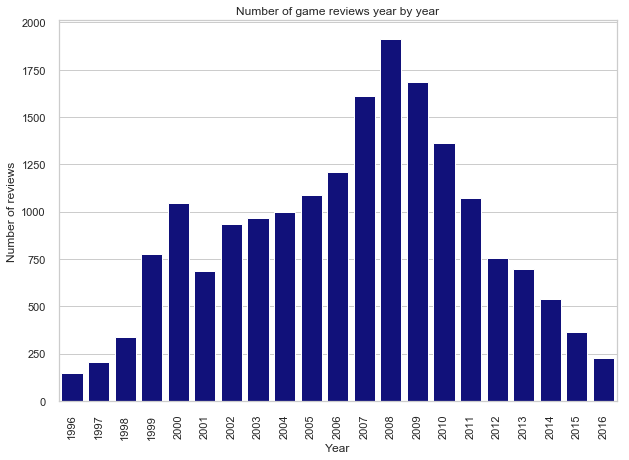

In [261]:
plt.figure(figsize=(10,7))
sns.barplot(data = by_year, x = by_year.index, y = "Unnamed: 0", color = "darkblue")
plt.xticks(rotation=90)
plt.title('Number of game reviews year by year')
plt.ylabel('Number of reviews')
plt.xlabel('Year')
None

# Do game scores vary from year to year?

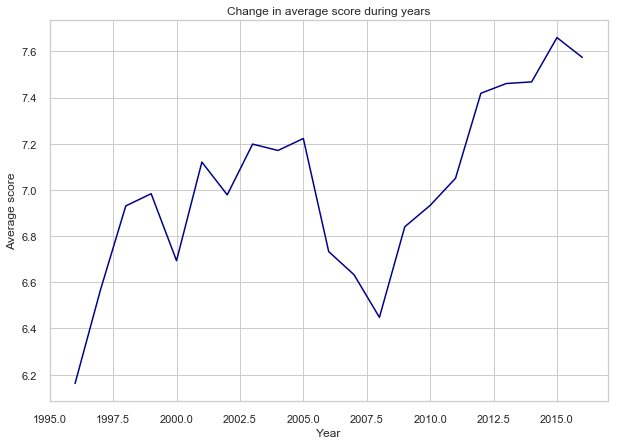

In [263]:
year_filter = df[df["release_year"] > 1990]
year_mean2 = year_filter.groupby("release_year")["score"].mean()


plt.figure(figsize=(10,7))
sns.lineplot(data=year_mean2, color = "darkblue")
plt.title('Change in average score during years')
plt.ylabel('Average score')
plt.xlabel('Year')
None

# Platform with the highest average reviews?


In [123]:
platform_average = df.groupby("platform").score.agg(["count", 'mean'])
platform_average

count      mean
platform                             
Android                  39  7.546154
Arcade                   11  6.036364
Atari 2600                5  5.900000
Atari 5200                2  8.000000
Commodore 64/128          6  6.416667
DVD / HD Video Game       1  1.000000
Dreamcast               286  7.370280
Dreamcast VMU             1  3.000000
Game Boy                 22  7.813636
Game Boy Advance        623  6.626645
Game Boy Color          356  6.193820
Game.Com                  3  5.333333
GameCube                509  7.042436
Genesis                  58  6.551724
Linux                    10  7.610000
Lynx                     82  7.134146
Macintosh                81  8.120988
Master System            13  6.769231
N-Gage                   30  6.730000
NES                      49  6.610204
NeoGeo                   10  6.500000
NeoGeo Pocket Color      31  7.322581
New Nintendo 3DS          2  7.750000
Nintendo 3DS            225  7.319111
Nintendo 64             302  6.976490
Nintendo 64DD             7  6.628571
Nintendo DS            1045  6.286986
Nintendo DSi            254  6.375197
Ouya                      1  8.000000
PC                     3370  7.147359
PlayStation             952  6.582458
PlayStation 2          1686  6.866548
PlayStation 3          1356  7.189159
PlayStation 4           277  7.663538
PlayStation Portable    633  6.748499
PlayStation Vita        155  7.394839
Pocket PC                 1  8.500000
Saturn                    6  7.283333
Sega 32X                 16  5.450000
Sega CD                   1  7.000000
SteamOS                   1  8.900000
Super NES                33  7.727273
TurboGrafx-16            40  6.585000
TurboGrafx-CD             3  8.000000
Vectrex                   2  6.250000
Web Games                 1  8.000000
Wii                    1366  6.299268
Wii U                   114  7.465789
Windows Phone            14  6.757143
Windows Surface           1  6.700000
Wireless                910  7.177363
WonderSwan                4  6.500000
WonderSwan Color          1  8.600000
Xbox                    821  7.205603
Xbox 360               1631  7.105334
Xbox One                208  7.655769
iPad                     99  7.672727
iPhone                  842  7.288005
iPod                     17  6.964706

Plotting platforms that have more than 100 reviews/scores

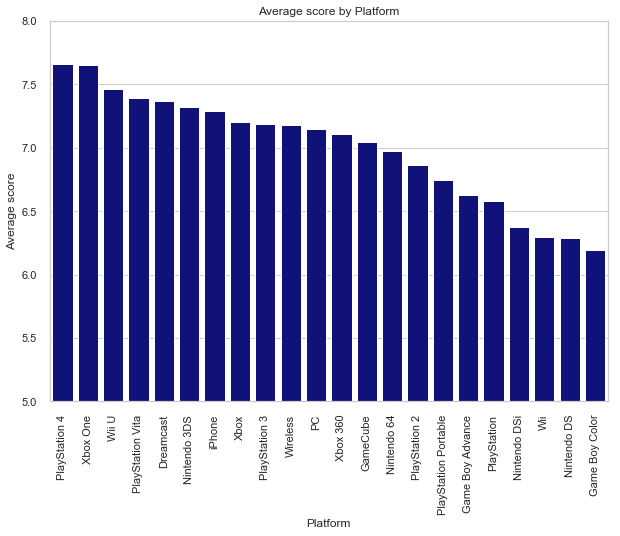

In [191]:
averages = platform_average.query('count > 100').sort_values(
    'mean', ascending=False).reset_index()


plt.figure(figsize=(10, 7))
sns.barplot(data=averages, x='platform', y='mean', color="darkblue")
plt.xticks(rotation=90)
plt.ylim(5, 8)
plt.title('Average score by Platform')
plt.ylabel('Average score')
plt.xlabel('Platform')
plt.show()

# Are best rated games released at a specific time of the year?

Distribution of best games (rating above 8.5) and all games, look very similar, with a peak in November.

Text(0.5, 1.0, 'Number of highly rated(above 8.5) releases by month')

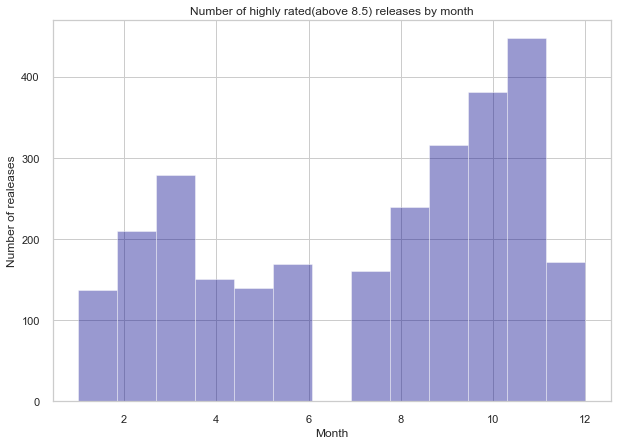

In [219]:
plt.figure(figsize=(10, 7))
sns.distplot(df["release_month"][df["score"] > 8.5],
             color='darkblue', kde=False)
plt.ylabel('Number of realeases')
plt.xlabel('Month')
plt.title('Number of highly rated(above 8.5) releases by month')

Text(0.5, 0, 'Month')

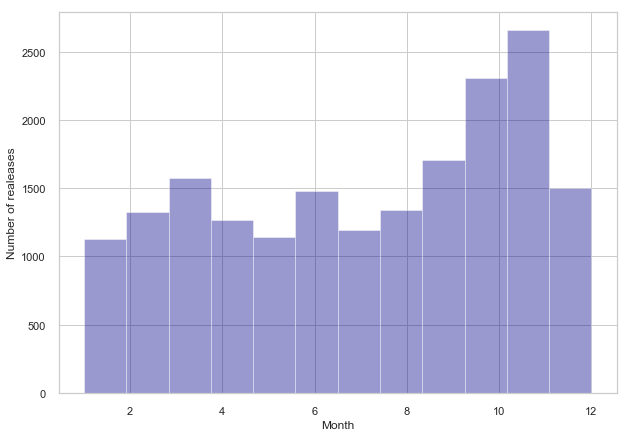

In [217]:
plt.figure(figsize=(10, 7))
sns.distplot(df["release_month"][df["score"] > 0],
             color='darkblue', kde=False, bins=12)
plt.ylabel('Number of realeases')
plt.xlabel('Month')
plt.title('Number of releases by month'))

# Which are the highest rated genres and their average scores?

In [319]:
# Selecting top 20 most often rated genres

top_genres = df.groupby('genre').agg("count").sort_values(
    by='Unnamed: 0', ascending=False).reset_index().iloc[:20]

top_list = list(top_genres.genre)

In [326]:
# Filter the df using a list of genres

genres = df[df["genre"].isin(top_list)]

# Return average scores by genre

genres = genres.groupby("genre")['score'].mean().sort_values(
    ascending=False).reset_index()

genres.head()

genre     score
0                RPG  7.571429
1        Action, RPG  7.464848
2  Action, Adventure  7.371895
3           Strategy  7.246032
4         Platformer  7.186513

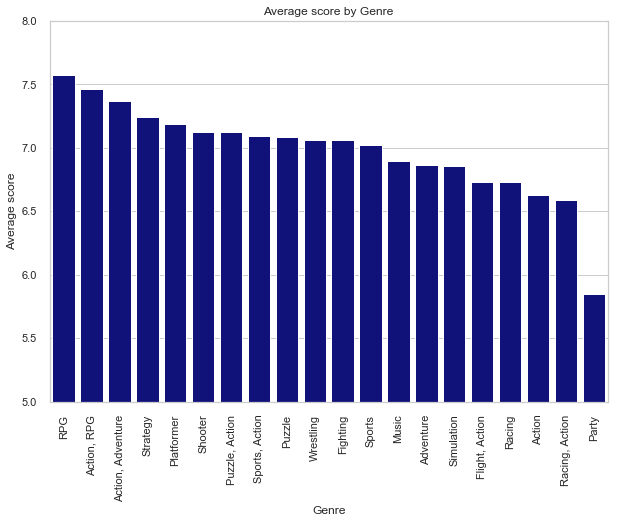

In [328]:
plt.figure(figsize=(10, 7))
sns.barplot(data=genres, x='genre', y='score', color="darkblue")
plt.xticks(rotation=90)
plt.ylim(5, 8)
plt.title('Average score by Genre')
plt.ylabel('Average score')
plt.xlabel('Genre')
plt.show()